<a href="https://colab.research.google.com/github/fatima448/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Titanic Preprocessing**


In [250]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
titanic_data=pd.read_csv('/content/Titanic-Dataset.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


After loading the dataset and printing the first five rows, I observed that the
dataset contains passenger-level information from the Titanic.

 **Columns:**
- PassengerId: Unique identifier for each passenger.
- Survived: Target label (0 = did not survive, 1 = survived).
- Pclass: Passenger ticket class
- Name: Passenger name.
- Sex: Passenger gender.
- Age: Passenger age.
- SibSp: Number of siblings/spouses aboard.
- Parch: Number of parents/children aboard.
- Ticket: Ticket number.
- Fare: Ticket fare paid.
- Cabin: Cabin number.
- Embarked: Port of embarkation.

In general, this dataset can be used to build a simple machine learning model that predicts whether a passenger survived or not (a binary classification problem) based on features such as sex, age, ticket class, and fare. It is also useful for exploratory analysis, where we can study patterns in the data and understand which factors seem to be most related to survival for example, comparing survival rates across genders, passenger classes, or different age groups.



In [252]:
titanic_data.shape


(891, 12)

- The dataset has **891 rows** (passengers) and **12 columns** (features).


In [253]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- `info()` shows column names, data types, and non-null counts.
- Missing values exist in **Age (714/891)**, **Cabin (204/891)**, and **Embarked (889/891)**.
- Data types include **int64**, **float64**, and **object** (categorical/text).


In [254]:

numerical_features = titanic_data.select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = titanic_data.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumerical features:", numerical_features)
print("\nCategorical features:", categorical_features)



Numerical features: ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

Categorical features: ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


- I separated features into **numerical** (int/float) and **categorical** (object) to plan preprocessing:
  - Numerical features may need scaling or missing-value handling.
  - Categorical features usually need encoding (e.g., label).

 Although **Pclass** is numeric, it actually represents ticket class categories (1,2,3), so I treat it as a categorical feature.



In [255]:
titanic_data.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Using `isnull().sum()`, I found missing values in:
- **Age:** 177 missing
- **Cabin:** 687 missing
- **Embarked:** 2 missing  
All other columns have **0** missing values.


### Data Visualization

<Axes: xlabel='Age', ylabel='Count'>

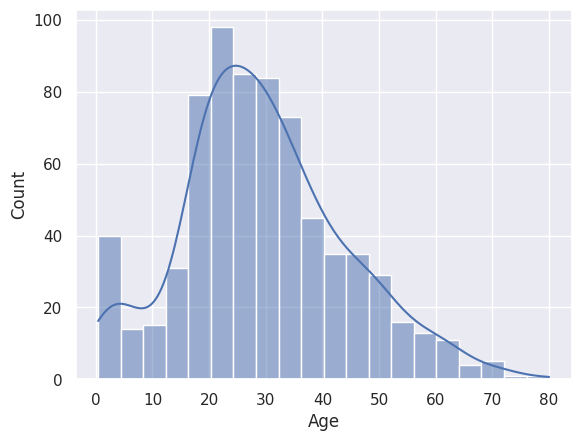

In [256]:
sns.histplot(titanic_data['Age'], kde=True)

This histogram shows how ages are spread in the dataset. I can see most passengers are adults. Since Age has missing values, I need to handle them before training a model (fill or remove).


<Axes: xlabel='Fare', ylabel='Count'>

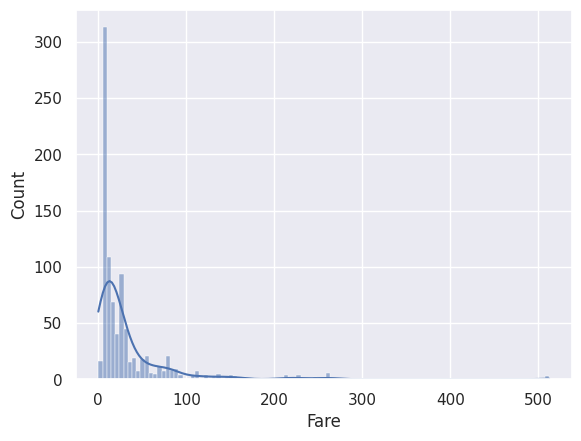

In [257]:
sns.histplot(titanic_data['Fare'], kde=True)

This shows the ticket prices. Most fares are low, but there are some very high values, so the distribution looks skewed. This means Fare has outliers and later I might need scaling or maybe a log transform.


<Axes: xlabel='SibSp', ylabel='Count'>

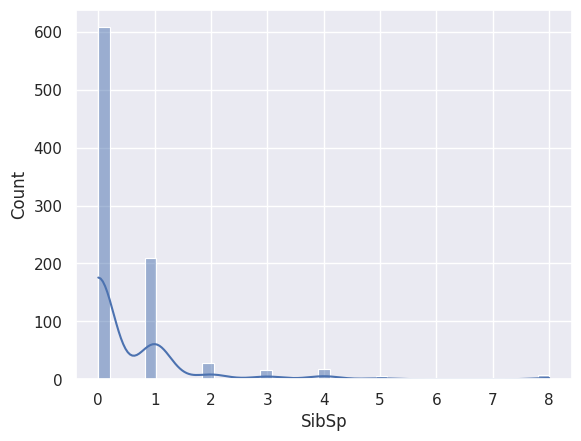

In [258]:
sns.histplot(titanic_data['SibSp'], kde=True)

This shows how many siblings/spouses each passenger had onboard. Most people have 0 (or 1).

<Axes: xlabel='Parch', ylabel='Count'>

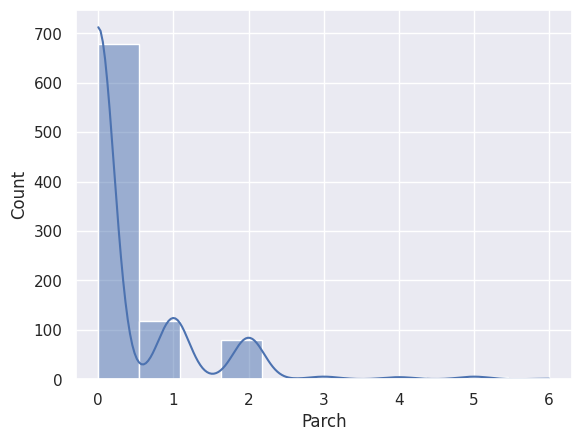

In [259]:
sns.histplot(titanic_data['Parch'], kde=True)

This shows how many parents/children each passenger had onboard. Most are 0 and only a few are higher.


<Axes: xlabel='Age'>

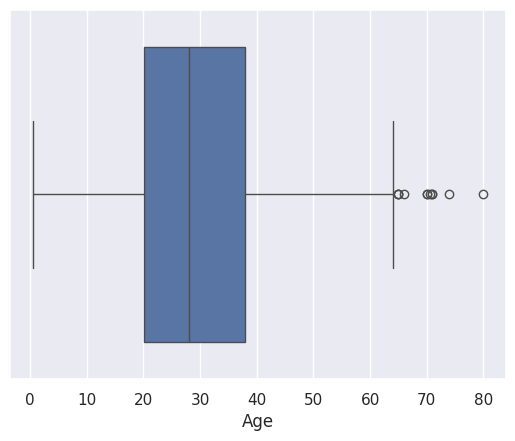

In [260]:
sns.boxplot(x=titanic_data['Age'])

This box plot helps me see the range of ages and if there are any unusual ages. If some points are far away, they might be outliers, but they could still be real ages. I’m not removing them now, just checking.


<Axes: xlabel='Fare'>

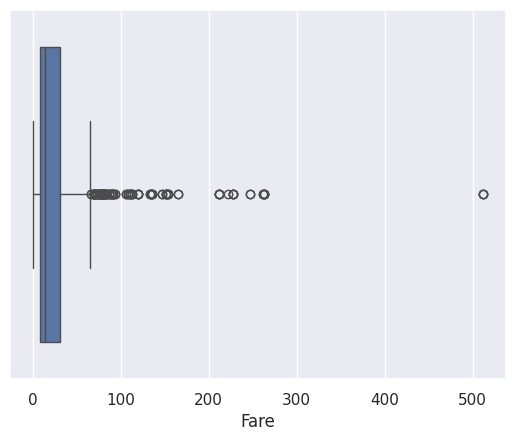

In [261]:
sns.boxplot(x=titanic_data['Fare'])

This box plot shows outliers clearly for Fare. I can see some tickets are extremely expensive compared to the rest. This can affect models, so later it may need scaling/transforming.


<Axes: xlabel='SibSp'>

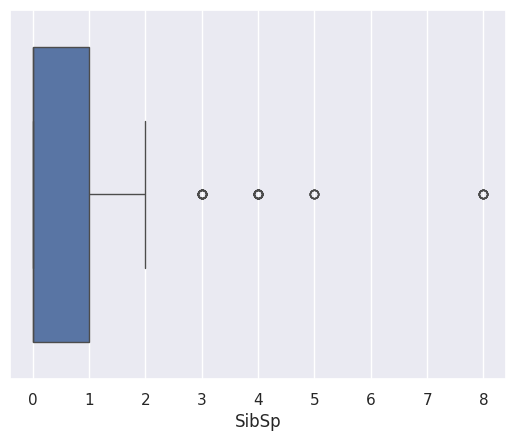

In [262]:
sns.boxplot(x=titanic_data['SibSp'])

This shows the spread of SibSp and if there are extreme values. A few passengers have a high number compared to most people.


<Axes: xlabel='Parch'>

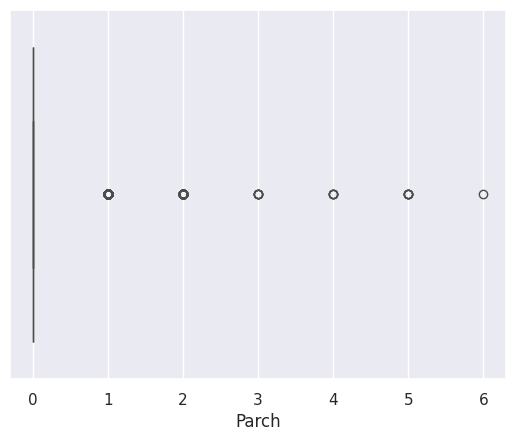

In [263]:
sns.boxplot(x=titanic_data['Parch'])

This shows the spread of Parch and possible outliers. Most passengers are around 0, and some values are higher but not many.


<Axes: xlabel='Sex', ylabel='count'>

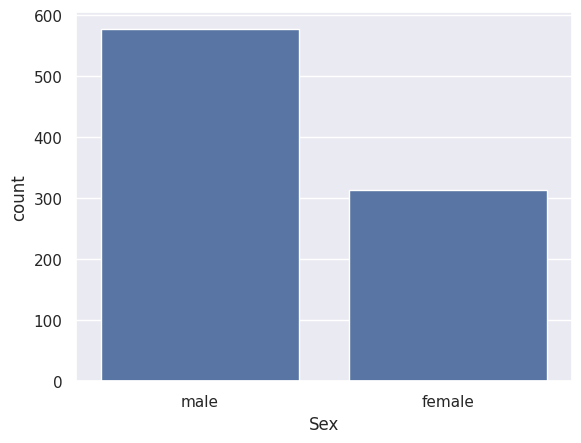

In [264]:

sns.countplot(x='Sex', data=titanic_data)

This count plot shows how many males vs females are in the dataset. It looks imbalanced. Sex is categorical, so I will need to encode it before using it in a model.


<Axes: xlabel='Embarked', ylabel='count'>

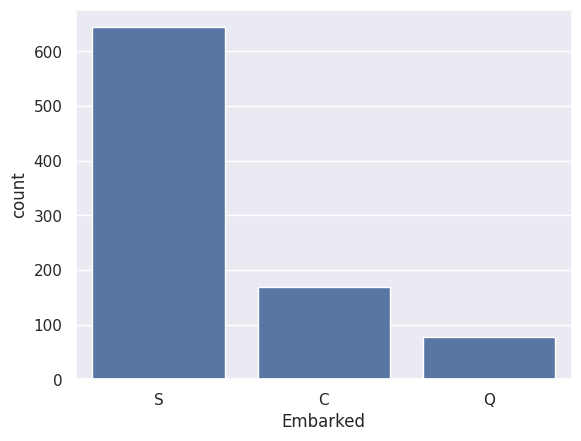

In [265]:
sns.countplot(x='Embarked', data=titanic_data)

This shows how many passengers boarded from each port (Embarked). One port has much more passengers than the others. Also because Embarked has missing values, it makes sense to fill them with the most common port.


<Axes: xlabel='Survived', ylabel='count'>

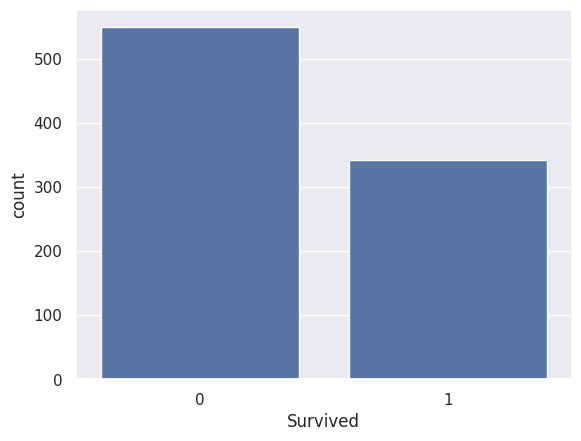

In [266]:
sns.countplot(x='Survived', data=titanic_data)

This shows how many survived vs did not survive. If one class is much bigger, it means the target is a bit imbalanced. It’s important to know before training a classifier.


<Axes: xlabel='Sex', ylabel='count'>

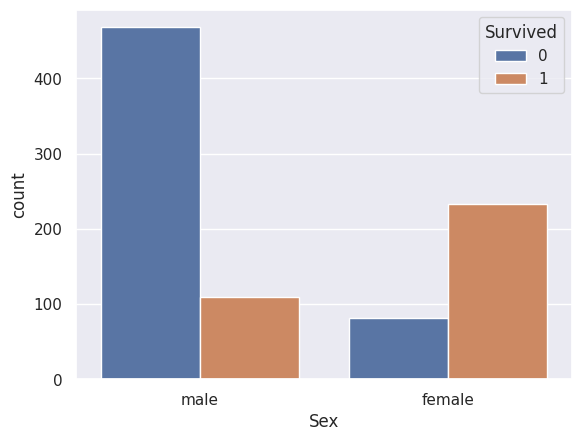

In [267]:
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

This plot compares survival counts for males and females. I can see survival is not the same for both, so Sex seems like an important feature. That’s why I shouldn’t drop it and I must encode it correctly.


<Axes: >

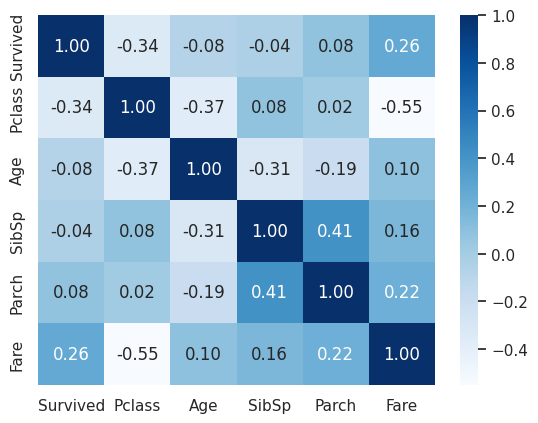

In [268]:
corr = titanic_data[['Survived','Pclass','Age','SibSp','Parch','Fare']].corr()

sns.heatmap(corr, annot=True, cmap='Blues', fmt=".2f")

This heatmap shows correlations between the numerical columns and Survived. Some variables have stronger relationships than others (like Fare and Pclass). This helps me understand which features might be related or redundant.

###Handling Missing values

In [269]:

titanic_data['Age'] = titanic_data['Age'].fillna(titanic_data['Age'].mean())
titanic_data['Embarked'] = titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0])


titanic_data = titanic_data.drop(columns=['Cabin'])

titanic_data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


From the missing error value list i found that:


- Dropped **Cabin** because it contains too many missing values.
- Filled missing **Age** using the mean.
- Filled missing **Embarked** using the most common value (mode).
- Checked again to ensure no missing values remain.





In [271]:
titanic_data.to_csv("titanic_cleaned.csv", index=False)


In [272]:
from google.colab import files
files.download("titanic_cleaned.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>